<a href="https://colab.research.google.com/github/pedromperezc/CEIA/blob/master/AP/Desafio_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Red Neuronal Feed Forward en PyTorch

Resolver el ejercicio 2 de la Clase 2 utilizando una red neuronal feed forward en PyTorch. Pueden usar los notebooks de la clase de referencia.

In [ ]:
%matplotlib inline
import numpy as np
import torch
import torch.optim as optim
import torch.nn as nn
import matplotlib.pylab as plt

torch.set_printoptions(edgeitems=2, linewidth=75)

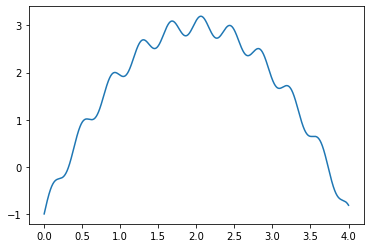

In [ ]:
# a. Dataset sintetico:
X = torch.tensor(np.linspace(0,4,10000))
y = -1*(X-2)**2 + 3 + 0.2 * np.sin(16 * X)

plt.plot(X, y)

In [ ]:
# size of input 
n_x = X.shape[0]
# size of hidden layer 
n_h = 5
# number of outputs 
n_y = 1
# learning rate 
learning_rate = 0.5

In [ ]:
class Net(nn.Module):
    def __init__(self, n_x, n_h, n_y):
        super().__init__()  # <1>
        
        self.hidden_linear = nn.Linear(n_x, n_h)
        self.hidden_activation = nn.Sigmoid()
        self.output_linear = nn.Linear(n_h, n_x)
        
    def forward(self, input):
        x = self.hidden_linear(input)
        x = self.hidden_activation(x)
        x = self.hidden_linear(input)
        x = self.hidden_activation(x)
        x = self.output_linear(x)
        
        return x
    
model = Net(n_x, n_h, n_y)
model

Net(
  (hidden_linear): Linear(in_features=10000, out_features=5, bias=True)
  (hidden_activation): Sigmoid()
  (output_linear): Linear(in_features=5, out_features=10000, bias=True)
)

In [ ]:
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
loss = nn.MSELoss()

In [ ]:
def train(X, y, model, optimizer, loss, epochs):
    cost = []
    total=0
    for epoch in range(epochs):
        yhat = model(X.float())
        output = loss(y.float(), yhat)
        output.backward()
        optimizer.step()
        optimizer.zero_grad()
        cost.append(output.item())

    return cost

Text(0.5, 1.0, 'cross entropy loss')

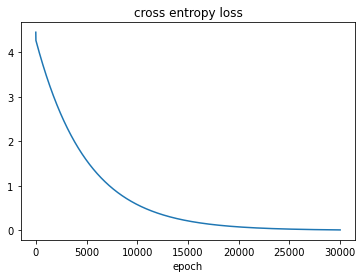

In [ ]:
cost_cross = train(X, y, model, optimizer, loss, epochs=30000)
#plot the loss
plt.plot(cost_cross)
plt.xlabel('epoch')
plt.title('cross entropy loss')

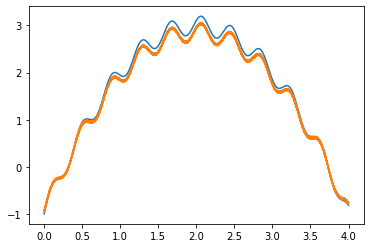

In [ ]:
y_hat = model(X.float())

plt.plot(X, y)
plt.plot(X, y_hat.detach().numpy())
plt.show()
